In [228]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [229]:
# directories for train and test data
train_dir = '/Users/nolimitmide/Desktop/test/Packages'
test_dir = '/Users/nolimitmide/Desktop/test/test'

In [230]:
# Define batch size and image dimensions
batch_size = 32
image_height = 150
image_width = 150

In [231]:
# Define class-specific data augmentation parameters
data_augmentation_params = {
    'Milk': {
        'rotation_range': 20,
        'width_shift_range': 0.2,
        'height_shift_range': 0.2,
        'shear_range': 0.2,
        'zoom_range': 0.2,
        'horizontal_flip': True
    },
    'Milo': {
        'rotation_range': 30,
        'width_shift_range': 0.1,
        'height_shift_range': 0.1,
        'shear_range': 0.1,
        'zoom_range': 0.1,
        'horizontal_flip': True
    },
    'Sugar': {
        'rotation_range': 15,
        'width_shift_range': 0.15,
        'height_shift_range': 0.15,
        'shear_range': 0.15,
        'zoom_range': 0.15,
        'horizontal_flip': True
    }
}

In [232]:
# ImageDataGenerator for data preprocessing and augmentation
train_datagens = {}
for class_name, params in data_augmentation_params.items():
    train_datagens[class_name] = ImageDataGenerator(
        rescale=1./255,
        validation_split=0.2,
        **params
    )

# Generate augmented data for each class separately
for class_name, datagen in train_datagens.items():
    print(f"Generating augmented data for class: {class_name}")
    class_dir = os.path.join(train_dir, class_name)
    output_dir = os.path.join(train_dir, f"{class_name}_augmented")
    
    # Create output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)
    
    # Create ImageDataGenerator for the specific class
    class_generator = datagen.flow_from_directory(
        class_dir,
        target_size=(image_height, image_width),
        batch_size=batch_size,
        class_mode='categorical',
        subset='training',  # Use only the training subset for augmentation
        save_to_dir=output_dir,  # Save augmented images to output directory
        save_prefix=f"{class_name}_aug",
    )
    
    # Generate augmented images
    num_augmented_images = 0
    for i, (images, _) in enumerate(class_generator):
        num_augmented_images += len(images)
        if i >= 9:  # Generate 10 batches (10 * batch_size images)
            break
    
    print(f"Generated {num_augmented_images} augmented images for class: {class_name}")


Generating augmented data for class: Milk
Found 53 images belonging to 1 classes.


Generated 265 augmented images for class: Milk
Generating augmented data for class: Milo
Found 53 images belonging to 1 classes.
Generated 265 augmented images for class: Milo
Generating augmented data for class: Sugar
Found 53 images belonging to 1 classes.
Generated 265 augmented images for class: Sugar


In [233]:
# Data generator for training
train_generator = train_datagens['Milk'].flow_from_directory(
    train_dir,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',  # Use only the training subset after augmentation
)


Found 795 images belonging to 6 classes.


In [234]:
# Data generator for testing
test_generator = train_datagens['Milk'].flow_from_directory(
    train_dir,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',  # Use the validation subset for testing
)

Found 198 images belonging to 6 classes.


In [235]:
# Define the CNN model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(image_height, image_width, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(train_generator.num_classes, activation='softmax')
])

In [236]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [237]:
# Display model architecture
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_33 (Conv2D)              │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_33 (MaxPooling2D) │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_34 (MaxPooling2D) │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_35 (Conv2D)              │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_35 (MaxPooling2D) │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 64)             │     2,367,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,461,190 (9.39 MB)

 Trainable params: 2,461,190 (9.39 MB)

 Non-trainable params: 0 (0.00 B)

In [238]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size
)

Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.2877 - loss: 1.7880 - val_accuracy: 0.6354 - val_loss: 1.3258
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5625 - loss: 1.5182 - val_accuracy: 0.5000 - val_loss: 1.4286
Epoch 3/10


2024-05-08 09:51:57.359212: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-08 09:51:57.506976: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


24/24 ━━━━━━━━━━━━━━━━━━━━ 39s 945ms/step - accuracy: 0.5273 - loss: 1.3151 - val_accuracy: 0.7083 - val_loss: 0.9865
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5938 - loss: 0.9976 - val_accuracy: 0.6667 - val_loss: 1.0661
Epoch 5/10


2024-05-08 09:52:37.106176: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-08 09:52:37.160098: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


24/24 ━━━━━━━━━━━━━━━━━━━━ 27s 999ms/step - accuracy: 0.6732 - loss: 0.9795 - val_accuracy: 0.6510 - val_loss: 0.9075
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8889 - loss: 0.5215 - val_accuracy: 1.0000 - val_loss: 0.3687
Epoch 7/10


2024-05-08 09:53:04.420147: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-08 09:53:04.479627: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


24/24 ━━━━━━━━━━━━━━━━━━━━ 41s 990ms/step - accuracy: 0.7243 - loss: 0.7483 - val_accuracy: 0.6927 - val_loss: 0.9311
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8750 - loss: 0.5612 - val_accuracy: 0.5000 - val_loss: 0.9205
Epoch 9/10


2024-05-08 09:53:46.306948: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-08 09:53:46.364101: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


24/24 ━━━━━━━━━━━━━━━━━━━━ 29s 968ms/step - accuracy: 0.7580 - loss: 0.7210 - val_accuracy: 0.6979 - val_loss: 0.7676
Epoch 10/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8125 - loss: 0.6151 - val_accuracy: 1.0000 - val_loss: 0.2626


2024-05-08 09:54:16.083331: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-08 09:54:16.133779: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


In [239]:
# Evaluate the model
loss, accuracy = model.evaluate(test_generator)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 309ms/step - accuracy: 0.6773 - loss: 0.7454
Test Loss: 0.7228278517723083
Test Accuracy: 0.7020202279090881


TEST THE MODEL WITH IMAGES. {JUST REPLACE THE IMAGE PATH}

In [240]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

In [243]:
# Load an image for testing (replace 'path_to_image.jpg' with the actual path)
image_path = '/Users/nolimitmide/Desktop/test/Packages/Sugar/Golden-Penny-Sugar-500G/ Golden-Penny-Sugar-500G_13.jpeg'
img = image.load_img(image_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Preprocess the image (normalize pixel values)
img_array /= 255.0

# Make a prediction using the loaded model
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


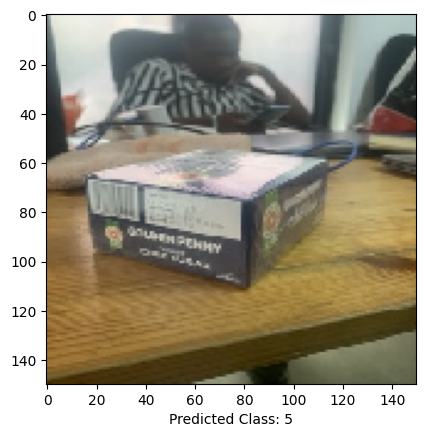

In [244]:
# Display the image and predicted class
plt.imshow(img)
plt.xlabel(f'Predicted Class: {predicted_class}')
plt.show()